In [1]:
from keras.datasets import reuters

Using TensorFlow backend.


In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
num_words=10000)

In [3]:
#Preparing the data
#Encoding 

import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [4]:
#One-hot encoding

def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [5]:
#Model Definition (using single layer)

from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(46, activation='softmax'))

In [6]:
#Compiling model

model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [7]:
#Setting aside a validation set

x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [8]:
#Training the model

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 167us/step - loss: 2.6988 - accuracy: 0.5786 - val_loss: 1.9230 - val_accuracy: 0.6590
Epoch 2/20
7982/7982 [==============================] - 1s 136us/step - loss: 1.5529 - accuracy: 0.7205 - val_loss: 1.3908 - val_accuracy: 0.7210
Epoch 3/20
7982/7982 [==============================] - 1s 138us/step - loss: 1.1066 - accuracy: 0.7791 - val_loss: 1.1497 - val_accuracy: 0.7710
Epoch 4/20
7982/7982 [==============================] - 1s 141us/step - loss: 0.8515 - accuracy: 0.8302 - val_loss: 1.0204 - val_accuracy: 0.7920
Epoch 5/20
7982/7982 [==============================] - 1s 136us/step - loss: 0.6777 - accuracy: 0.8663 - val_loss: 0.9431 - val_accuracy: 0.8010
Epoch 6/20
7982/7982 [==============================] - 1s 136us/step - loss: 0.5534 - accuracy: 0.8933 - val_loss: 0.8890 - val_accuracy: 0.8130
Epoch 7/20
7982/7982 [==============================] - 1s 136us/step - loss

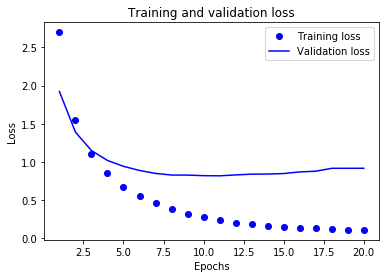

In [22]:
#Plotting the training and validation loss

import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

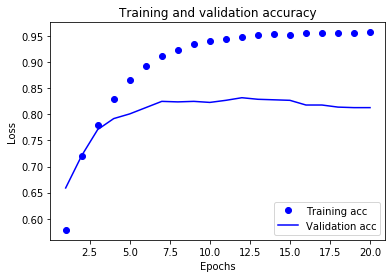

In [10]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [24]:
#Retraining a model from scratch

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
model.fit(partial_x_train,
            partial_y_train,
            epochs=9,
            batch_size=512,
            validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 144us/step - loss: 2.6431 - accuracy: 0.5433 - val_loss: 1.8473 - val_accuracy: 0.6490
Epoch 2/9
7982/7982 [==============================] - 1s 159us/step - loss: 1.4968 - accuracy: 0.7160 - val_loss: 1.3588 - val_accuracy: 0.7230
Epoch 3/9
7982/7982 [==============================] - 1s 142us/step - loss: 1.0824 - accuracy: 0.7843 - val_loss: 1.1379 - val_accuracy: 0.7640
Epoch 4/9
7982/7982 [==============================] - 1s 149us/step - loss: 0.8413 - accuracy: 0.8300 - val_loss: 1.0169 - val_accuracy: 0.8000
Epoch 5/9
7982/7982 [==============================] - 1s 138us/step - loss: 0.6731 - accuracy: 0.8672 - val_loss: 0.9392 - val_accuracy: 0.8150
Epoch 6/9
7982/7982 [==============================] - 1s 138us/step - loss: 0.5479 - accuracy: 0.8935 - val_loss: 0.8928 - val_accuracy: 0.8170
Epoch 7/9
7982/7982 [==============================] - 1s 138us/step - loss: 0.453

In [25]:
#final results:

results

[0.9101515366154278, 0.7951914668083191]

This approach reaches an accuracy of ~80%. With a balanced binary classification
problem, the accuracy reached by a purely random classifier would be 50%. But in
this case it’s closer to 19%, so the results seem pretty good, at least when compared to
a random baseline:

In [26]:
import copy

In [27]:
test_labels_copy = copy.copy(test_labels)

In [28]:
np.random.shuffle(test_labels_copy)

In [29]:
 hits_array = np.array(test_labels) == np.array(test_labels_copy)

In [30]:
float(np.sum(hits_array)) / len(test_labels)

0.19946571682991987

In [31]:
#Generating predictions on new data

predictions = model.predict(x_test)

In [32]:
predictions[0].shape

(46,)

In [33]:
np.sum(predictions[0])

1.0000001

In [34]:
 np.argmax(predictions[0])

3